# **Optimal intertemporal allocation of ressources**

Olivier Pannekoucke 
INPT-ENM / CNRM / CERFACS

<h3 style="font-variant:small-caps;"><center>Abstract</center></h3>

<div style="margin:0 50px 0 50px">
<div style="background:rgb(230,230,255)">

    
In this course, we extend the Solow growth model by endogenizing consumption with intergenerational welfare, which is consistent with the Ramsey model.

After detailling the Ramsey model on a finite horizon time, a numerical exploration is proposed to asses the optimal path and its variations to economical parameters. This corresponds to a preliminary exploration of macroeconomics which helps to tackle more advanced integrated assessement model, as DICE, the model of Nordhaus, the nobel prize of economy 2018.
    
 </div>
<b>keywords</b>: <i> Ramsey model, endogenous consumption, welfare function, finite and infinite horizon time optimization</i>
</div>




## **Introduction**

**Background on Solow model of growth**

Solow model of growth represent an economy driven by the dynamics of the capital,$K$, for a population of size $L$ growing at a rate $n$. Accouting for depreciation of the capital at a rate $\delta$, the dynamics reads as 
\begin{equation}
(1)\qquad
\left\{\begin{array}{l}
 \dot K = s Y - \delta K,\\
 Y = A K^\alpha L^{1-\alpha},\\
\dot L = n L.
\end{array}\right.
\end{equation}
where $Y$ is the output of the economy which can be seen as the **Gross Domestic Product** (GDP) (PIB in French), explained here from the two factors of production $(K,L)$ following the production function $Y=F(K,L)=AK^\alpha L^{1-\alpha}$ a **Cobb-Douglas function** that is homogeneous of degree one $F(\lambda K,\lambda L)=\lambda  F(K,L)$.

Solow dynamics represent the return of capital that is due to investment $I$, which is equal to the saving $S$, which is exogenously modeled as a constant fraction of the GDP, $S=sY$. Since $Y=I+C$, where $C$ denotes the consumption, we obtain that $S=I=Y-C$ so it is possible to reformulate the dynamics of capital as 
$$\dot K = Y-C -\delta K.$$

Written in per capita values, dynamics of the capital per capita reads as 
$$(2)\qquad \dot k = f(k)-c -(\delta+n) k.$$
for $k=K/L$, $y=f(k)= A k^\alpha=F(k,1)$ where $y=Y/L$. 

Because of the exogenous modelling of the saving, the consumption is of course exogenously modeled from 
$$C=(1-s)Y.$$

Thus, nothing in Solow's model explains consumption, which should be explained by consumer preference.

**Organization of the notebook**

First we introduce the notion of utility that is a way to compare strategies of consumption in Section 1, and extend the utility function considering the consumption along the time under a finite then a continuous time period, leading to the welfare function. Section 2 introduces the Ramsey model with an endogenization of the consumption based on the welfare function, and solved from a numerical implementation of the command optimal. Readers explore the properties of the Ramsey model from numerical investigations that lead them to facilitate the introduction to the integrated assessement model DICE of Nordhaus (1922), which ends this introduction to the mitigation of climate change.

## **1. Explaining the consumption from the utility and welfare functions**

### **1.1 Consumption and utility**

**Utility as a measure of the consumption**

An utility function is a **concave function** that is introduced to quantify the amount of satisfaction to consume one or more goods.

For two goods, the utility $U(g_1,g_2)$ allows us to understand how the consumer can be indifferent to replacing one part of a good with another.




<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">

For a given set of goods $(g_1,g_2)$, show that the expression of the marginal rate of substitutions (MRS) which gives the increase of $g_2$ needed to compensate a decrease of $g_1$ without changing the level of satisfaction (that is $dU(g_1,g_2)=0$) reads as 
    $MRS_{2\leftarrow 1} = -\frac{\partial_{g_1}U}{\partial_{g_2}U}$
so that 
    $dg_2 = MRS_{2\leftarrow 1} dg_1$
</div>
</div>

***Answer here***

**Example of the constant-elasticity utility $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$ or $u(c)=\log c$ (when $\gamma=1$)**

The function $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$ is often introducted as a utility function.

In particular, the **elasticity consumption-utility**, defined by $\varepsilon_{cu} = \frac{dU/U}{dC/C}$, and **which represent the link between the relative variation of the utility to the relative variation of the consumption (or their percent of variations)**, is constant for this utility function.

**Comment** : elasticity is a common quantity in econometrics that relate percent of variation of many related quantities. As an example of interest, it has been introduce to differentiate consumer goods.

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
<ol>
    <li>Show that the elasticity $\varepsilon_{cu}$ is the constant $1-\gamma$ for  $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$.
    <li>Gives the formal expression of the elasticity price-quantity when price $P(Q)$ is a function of the quantity $Q$
</ol>
</div>
</div>

***Answer here***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u(c, γ=2):
    if γ==1:
        return np.log(c)
    else:
        return np.power(c,1-γ)/(1-γ)

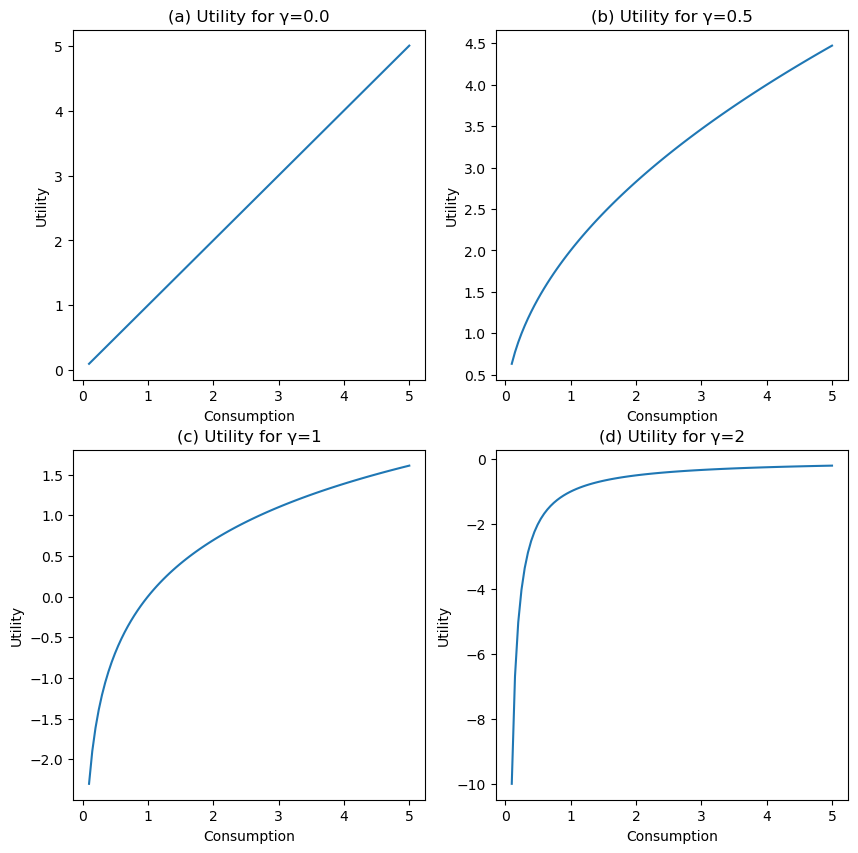

In [3]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
c = np.linspace(0.1,5,100)
for γ, ax, panel in zip([0., 0.5, 1, 2],axes.flatten(),'abcd'):
    ax.plot(c, u(c,γ))
    ax.set_xlabel('Consumption')
    ax.set_ylabel('Utility')
    ax.set_title(f'({panel}) Utility for γ={γ}')

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
From the definition of what is an utility function, justify that $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$ is a valid utility function.
</div>
</div>

***Answer here***

### **1.2 Intertemporal utility function / Welfare function**

#### **1.2.1 Consumption preference for two times**

**Inter-temporal utility interpretation**

The level of satisfaction resulting from the consumption of the same good between two instants can be written as
$$W = u(c_0) + \beta u(c_1).$$
To interpret this relationship, we return to the framework of optimization. The objective is to maximize $W$:

 * If $\beta\ll 1$, then maximizing $W$ is mainly the same as maximizing $W= u(c_0)$, so the consumption that counts is that of the beginning of the period.
 * Conversely, if $\beta\gg 1$, then maximizing $W$ is equivalent to maximizing $W=u(c_1)$, and it is the consumption at the end of the period that is important.
 * Finally, when $\beta=1$, then the weight of the two contributions is the same and the consumption of each period plays an equal role.

**Relative contribution**

The optimization of $W$ being at a multiplicative (positive) or additive factor, constant, optimizing $W$ in two instants amounts to optimizing the function 
$$W = \frac{1}{1+\beta}u(c_0) + \frac{\beta}{1+\beta} u(c_1).$$
This shows that the weight of consumption at time $0$ counts as $\frac{1}{1+\beta}$ and that at $t=1$, $\frac{\beta}{1+\beta}$.


**Intertemporal marginal rate of substitution**

Let's return to the case of two moments, such that $W = u(c_0) + \beta u(c_1)$. For a consumption plane $c=(c_0,c_1)$, the indifference for $W$ to substitute for consumption $c+dc=(c_0+dc_0, c_1+dc_1)$ *i.e* such that $W(c)=W(c+dc)$ is written  
$$dW = \partial_{c_0} W dc_0 + \partial_{c_1} W dc_1=0,$$
leading to the substitution relation
$$dc_1 = -\frac{\partial_{c0}W}{\partial_{c1}W} dc_0,$$
which can be interpreted as follows:

***To keep the same level of satisfaction (utility/well-being), choosing to replace a unit of consumption at time $t_0$ *i.e.* $dc_0=-1$, amounts to increasing consumption at time $t_1$ by $dc_1=+\frac{\partial_{c0}W}{\partial_{c1}W}$***

This gives rise to the quantity, called the intertemporal substitution rate
$$MRS_{1\leftarrow 0}=\frac{\partial_{c0}W}{\partial_{c1}W}= \frac{1}{\beta}\frac{u'(c_0)}{u'(c_1)}.$$

**Numerical illustration**

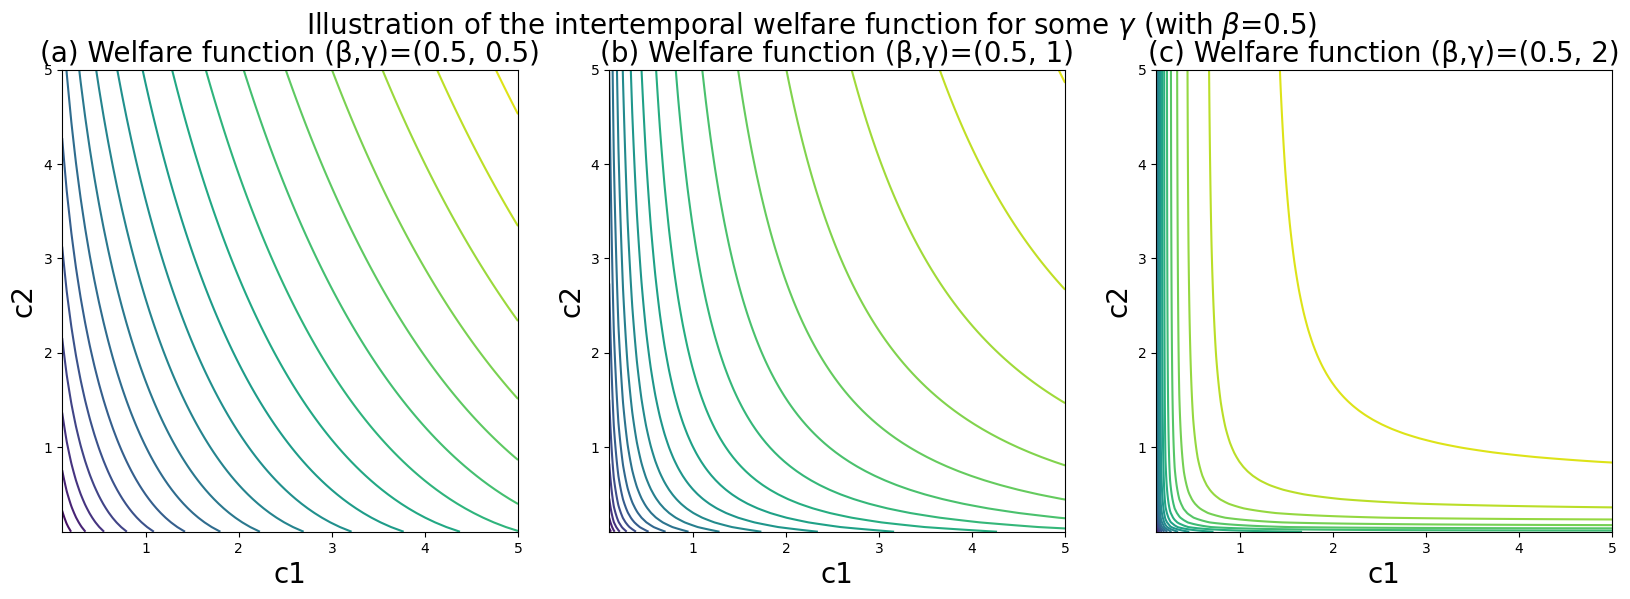

In [4]:
def W(c1,c2,β=0.95,γ=2): 
    """ Welfare function (or intertemporal utility function)"""
    return u(c1,γ)+β*u(c2,γ)

β = 0.5
fig, axes = plt.subplots(1,3,figsize=(20,6))

[C1,C2] = np.meshgrid(c,c)

for γ, ax, panel in zip([0.5, 1, 2],axes,'abc'):
    ax.contour(c,c,W(C1,C2,β=β, γ=γ),20)
    ax.set_xlabel('c1', fontsize=20)
    ax.set_ylabel('c2', fontsize=20)
    ax.set_title(f'({panel}) Welfare function (β,γ)={β,γ}', fontsize=20)
fig.suptitle(f"Illustration of the intertemporal welfare function for some $\gamma$ (with $\\beta$={β})", fontsize=20);

In [5]:
# Consumption between two instants
(
    W(2., 1., β=0.5),  # Consume 2 units at t_1, and 1 unit at t_2
    W(1., 2., β=0.5),  # Consume 1 units at t_1, and 2 unit at t_2
)

(-1.0, -1.25)

**Conclusion:** with $\beta=0.5$ we give a preference to consume in period $1$ compared to period $2$: $W(2,1)>W(1,2)$

#### **1.2.2 Intertemporal welfare function**

**Inter-temporal relative contribution: stationarity of relative weights between two consecutive moments**

To extend the welfare function to several moments, we can consider it as a sum weighted by the powers of $\beta$, which then allows us to compare the different periods with an equivalent ratio. 

Let us consider three moments, then $$W = u(c_0) + \beta u(c_1)+ \beta^2 u(c_2).$$

Thus, if we wish to fix the consumption level $c_0$, then this is no longer a quantity that should be part of the optimization; and the optimization problem amounts to optimizing 
$\tilde{W}=\beta u(c_1)+\beta^2 u(c_2)$, which is itself equivalent to optimizing 
$$\tilde{W}=u(c_1)+\beta u(c_2).$$

This shows that the comparison between the periods is finally always the same, despite the appearance of the formulation of $W$ to crush the contribution of future consumption. **From this point of view, the $W$ function presents a form of time invariance**.

**Welfare function over an arbitrary period**

Il en résulte que la fonction de bien-être pour une période $Q$ peut s'écrire comme 
$$
W = \sum_{q=0}^Q u(c_q) \beta^q  
$$


<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">

Show that the continuous formulation of the walfare function reads as $$U_0 = \int_0^T u(c) e^{-\theta t }dt,$$
where $\beta\sim e^{-\theta\delta t}\sim \frac{1}{1+\theta\delta t}$ and $c(t)$ is the consumption.
</div>
</div>

***Answer here***

## **2. Optimal consumption path: the Ramsey model**

### **2.1 Optimal path formulation**

Ramsey model explain the consumption by solving the following the optimization problem

$$(3)\qquad c = \textrm{ArgMax}U_0= \int_0^T u(c) e^{-\theta t }dt \text{ , subject to the dynamics of the capital } \dot k = f(k)-c -(\delta+n) k, \text{ with } k_0(0)=k_0, k(t)\geq 0 \text{ and } c(t)\geq 0.$$

where $f(k)= A k^\alpha$ is the GDP per capita, and with $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$ for numerical applications.

In this framework, $\gamma$ is **the rate of inequality aversion**. When $\gamma=0$, then $u$ is linear and the futur consumption is not important for the present consumption. When $\gamma>0$, there is an aversion to inequality because the utility is concave $u''<0$.

**Reformulation by introduction a consumption rate $c\in[0,1]$**

In order to use an optimizer that allows to control the value of $c$, the formulation as it is presented is complicated: indeed, $c$ has apparently no upper bound.

We can therefore reformulate the problem as a consumption rate, such that this time $c\in[0,1]$, which leads to writing the welfare as 
$$U_0 = \int_0^T u(c f(k)) e^{-(\rho-n) t }dt,$$

### **2.2 Numerical code**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import sympkf
import scipy.optimize as opt

class Ramsey(sympkf.Model):
    '''
    Economical model that represent
    '''
    
    def __init__(self, nbyears=100, γ=2., ρ=0.015, α=0.33, δ=0.1, n=0.01, β=None):        
        super().__init__(time_scheme='euler')
        print('Time scheme is Euler for Econ studies, with time step dt of 1 yr')
        self.γ = γ  # Elasticity of intertemporal substitution  / γ = 2 / (Grimaud et al., Table A.1, but denoted ϵ)
                    # Rate of inequality aversion
        self.δ = δ  # Depreciation rate of the capital          / δ = 0.1 /  
        self.ρ = ρ  # Discount rate for intertemporal utility   / ρ = 0.015 / (Grimaud et al., Table A.1)
        self.α = α  # Elasticity GDP/Capital in the Cobb-Douglas GDP / α = 0.33 / (Grimaud et al., Table A.1)
        self.A = 1. # Total productivity factor, that is the technology/innovation / A=1 / 
        self.n = n  # Population growth rate
        self._dt = 1
        self.β = np.exp(-(self.ρ-self.n)) if β is None else β # is the discount factor  / β = 0.95 
        
        self._time_window = np.array(self.window(nbyears), dtype='int32')
        self.nbyears = nbyears
        
        print('Note that the associated discount factor is β: ',self.β)
    
    @property
    def time_window(self):
        return self._time_window
    
    def predict(self, k0, c):
        self.set_c(c)
        return super().predict(self.time_window, k0)
    
    def set_c(self, c):
        self.__c = c
        
    def f(self, k):
        """
        Growth Domestic Production (PIB in french)
        """
        return self.A * np.power(k,self.α) 
                                         
    def u(self,c):
        """
        Utility function
        """
        γ = self.γ
        return np.power(c,1.-γ)/(1.-γ)

    def trend(self, t, k):
        y = self.f(k)
        investment = y*(1-self.__c[t])
        return investment-(self.δ+self.n)*k
            
    def welfare(self, c, k ):
        '''
        c : compstion rate (1-c) being the saving rate.
        k : capital per person.
        '''
        consumption = c*self.f(k)
        # return np.sum(self.u(consumption)*np.exp(-(self.ρ-self.n)*self.time_window[:-1]))*self._dt
        return np.sum(self.u(consumption)*np.power(self.β,self.time_window[:-1]) )
        
    def objfunc(self, c, k0):
        """
        Objective function for optimization of the welfare
        """
        # Convert array c into dict.
        #self.set_c(c)
        #k = self.predict(self._time_window, k0 )
        k = self.predict(k0,c)
        return -self.welfare(c, k[:-1])
        
    def plot_traj(self, k0, c):
        '''
        k0 : initial capital value
        c  : plan of consumption rate that ranges within [0,1]
        '''        
        k = self.predict(k0, c)
        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
        ax1.plot(self._time_window, k)
        ax1.set_xlabel('time')
        ax1.set_title('Captial')
        ax2.plot(self._time_window[:-1], c)
        ax2.set_xlabel('time')
        ax2.set_title('Consumption rate')
        
    def optimize(self, k0, bound=1.):
        """
        bound =1. for $c$ means that the consumption can not be larger than the GDP (no direct consumption of the capital).
        However, this could be modified.
        """
        c0 = np.zeros(self.nbyears)+0.1
        bounds = [(0, bound) for t in range(self.nbyears)] # Bounds for the consumption rate 'c'. 
        c_opt = opt.minimize(econ.objfunc, c0, 
                             args=(k0,),  # Additionnal arguments to provide to the objective function
                             bounds = tuple(bounds), # Bounds for seeking the consumption rate that ranges within [0,1]
                             method='SLSQP', options={'disp': True})
        self._c_opt = np.copy(c_opt.x)
        self._k_opt = self.predict(k0, self._c_opt)
        
    def plot_opt_traj(self):
        self.plot_traj(self._k_opt[0], self._c_opt)

### **2.3 Illustration of the computation of an optimal path**

In [12]:
econ = Ramsey(nbyears=300)

Time scheme is Euler for Econ studies, with time step dt of 1 yr
Note that the associated discount factor is β:  0.9950124791926823


**Example of the calculation of the welfare function (W) in the case of a consumption plan of 20% of GDP**

In [13]:
c = np.zeros(econ.nbyears)
c[:] = 0.2
econ.objfunc(c, k0=1.2)

311.7592419370429

**Optimization of consumption for a given initial GDP**

In [14]:
k0=1.
econ.optimize(k0=k0)

/tmp/ipykernel_4378/1231883615.py:49: RuntimeWarning: divide by zero encountered in power
  return np.power(c,1.-γ)/(1.-γ)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.19118104718103
            Iterations: 40
            Function evaluations: 12076
            Gradient evaluations: 40


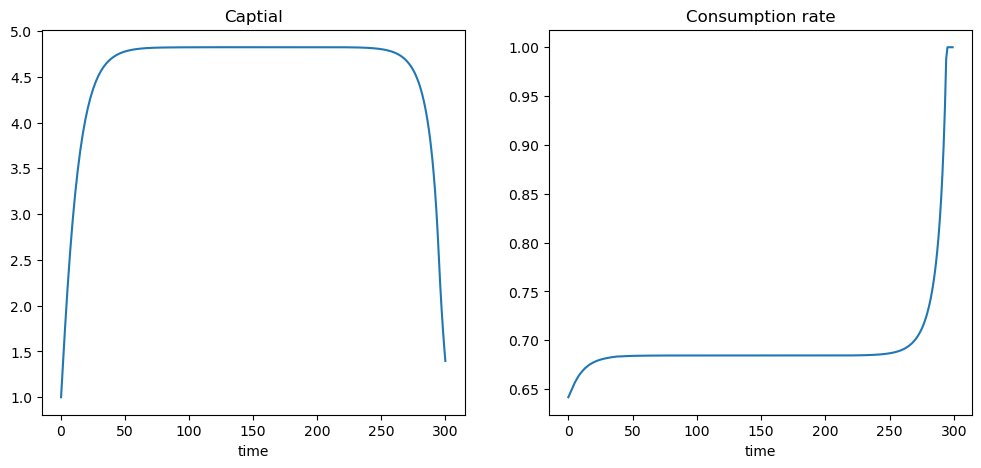

In [15]:
econ.plot_opt_traj()

In [12]:
print(f'Capital at the end of the time serie: {econ._k_opt[-1]}')
print(f'Maximum of capital reached over the period: {econ._k_opt.max()}')

Capital at the end of the time serie: 1.3952139801204733
Maximum of capital reached over the period: 4.759885856271043


<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
<ol>
    <li> What is the behavior of the consumption rate (saving rate) in the Ramsey model compared with the Solow model ? 
    <li> Can you explain why the consumption rate increases at the end of the period ?     
 </ol>
</div>
</div>

***Answer here***

**Convergence of optimal path for long period**

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">

From numerical experiments, find the optimal path for long term period, so to approximate the optimizing problem for $$U_0= \int_0^\infty u(c) e^{-\theta t }dt,$$
by considering an optimization over $200$, $300$ and $400$ years for a given economy.
</div>
</div>

***Answer here -- dot not forget to include the numerical simulation here in your results***

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
What is the sensitivity of the optimal path to the parameters of the economy, and for a long term period (300 years):
    <ol>
    <li> population growth rate ?
    <li> the depreciation rate of capital $\delta$?    
    <li> the discount rate of intertemporal utility $\rho$ ?
    <li> the rate of inequality aversion (elasticity utility-consumption) $\gamma$ ?
 </ol>
</div>
</div>

***Answer here (based on codes to develop)***

<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">
Technical innovation is not tacken into account here. How is if possible to introduce an exogenous increase of production to the innovation ?
</div>
</div>

***Answer here (no codes are needed for that part)***

## Conclusion 

Compared to Solow's model for which consumption was modeled exogenously, Ramsey's model makes consumption endogenous, introducing welfare maximization. 

As a follow-up, consider the article by Nordhaus 1992, “An Optimal Transition Path for Controlling Greenhouse Gases”, a nobel prize of economy for its work on mitigation to the climate change. Nordhaus (1992) gives a less recent description of Nordhaus's model DICE, but this article is small enough to catch the main ideas and results that can be obtained from such an Integrated Assessement Model.

We propose to explore this article by answering to the following questions:


<div style="margin:0 50px 0 50px">
<h4><b>Question: </b></h4>
<div style="background:MistyRose">

 <ol>
 <li> How is the Earth system represented?  
 <li> How is the effect of CO2e represented in this model (comment: $F(t)=\eta\log_2\frac{M(t)}{M(1750)}+F_{ext}(t)$)     
 <li> How does he construct the damage function $\tilde\Omega(t)$ and the abatement cost $\Lambda(t)$ (be careful, it's hidden in the notation $\Omega$ of the article...) ? 
 <li> Show that GDP is affected by climate change by two mechanisms, leading to an effective output of the economy written as $Q = \tilde\Omega(t)(1-\Lambda(t))Y$, with:
     <ul>
    <li> the effect of damage $Omega(t)$
    <li> the cost associated with decarbonization (abatement cost) $Lambda(t)
        </ul>     
<li>By analogy with Ramsey's model, describe how Nordhaus endogenizes climate change in its economic model.
<li>What policies does Nordhaus explore? 
<li>What are Nordhaus' main results? 
     </ol>
</div>
</div>
   

## **References**

 * O. Blanchard and S. Fisher, Lectures on macroeconomics. MIT Press, 1989, p. 650. (ch.2)
 * R. M. Solow, “A Contribution to the Theory of Economic Growth,” The Quarterly Journal of Economics, vol. 70, no. 1, p. 65, Feb. 1956, doi: 10.2307/1884513.
 * F. P. Ramsey, “A Mathematical Theory of Saving,” The Economic Journal, vol. 38, no. 152, p. 543, Dec. 1928, doi: 10.2307/2224098.
 * W. D. Nordhaus, “An Optimal Transition Path for Controlling Greenhouse Gases,” Science, vol. 258, no. 5086, pp. 1315–1319, 1992, Accessed: 2022-07-20. [Online]. Available: http://www.jstor.org/stable/2880417
 * Nobel prize of Economy 2018 scientific background, [“Economic Growth, Technological Change, And Climate Change: Scientific Background.” 2018.](https://www.nobelprize.org/uploads/2018/10/advanced-economicsciencesprize2018.pdf)

## **Appendix**

### **A. Connection with Solow model**

**Comparison with Solow (constant consumption plan and without consumption optimization)**

Example of a simulation in which consumption represents 20% of GDP, i.e. a constant investment of 80% of GDP.
In this case, the model works like a Solow model with the savings rate s=1-c= 0.8.

In particular, we expect the economy to converge to an equilibrium ($k=0$) given by  
$$k_\infty= \left(\frac{sA}{n+\delta}\right)^{\frac{1}{1-\alpha}}.$$

In [13]:
# Equilibrium from Solow model:
s = 1-0.2
k_inf_Solow = (s*econ.A/(econ.n+econ.δ))**(1/(1-econ.α))
print(k_inf_Solow)
# Ramsey evolution of the capital for the consumption strategy at rate c=0.2
c = np.zeros(econ.nbyears)
c[:] = 0.2

econ.predict(k0=1.0,c=c)

19.324816372365234


array([ 1.        ,  1.69      ,  2.45534547,  3.26129432,  4.08425589,
        4.90777922,  5.72025151,  6.51347374,  7.28172397,  8.02111222,
        8.72912043,  9.40426542, 10.0458471 , 10.65375734, 11.22833326,
       11.77024363, 12.28040038, 12.75988938, 13.20991626, 13.63176389,
       14.0267592 , 14.39624728, 14.74157137, 15.06405749, 15.36500281,
       15.64566705, 15.9072662 , 16.15096819, 16.37789013, 16.58909667,
       16.78559936, 16.96835678, 17.13827518, 17.29620965, 17.44296555,
       17.57930023, 17.70592487, 17.82350649, 17.93266998, 18.03400022,
       18.12804406, 18.21531248, 18.29628254, 18.37139934, 18.44107792,
       18.50570509, 18.56564113, 18.62122153, 18.67275848, 18.72054245,
       18.76484358, 18.80591301, 18.84398417, 18.87927397, 18.9119839 ,
       18.94230111, 18.97039939, 18.99644006, 19.02057289, 19.04293687,
       19.06366098, 19.08286489, 19.10065962, 19.11714814, 19.13242599,
       19.14658174, 19.15969754, 19.17184956, 19.18310842, 19.19

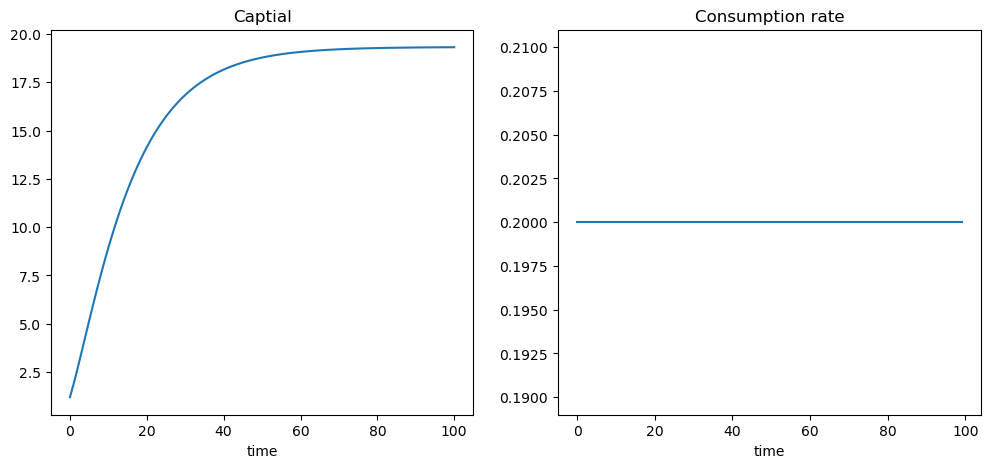

In [14]:
econ.plot_traj(k0=1.2, c=c)

**Conclusion**

In this particular case, where we choose a consumption path set at 20% of GDP, we find that the economy converges towards an equilibrium corresponding to that of the Solow model.

### **B. Validation of the optimal path**

Optimality of the path means that for any perturbation of the consumption trajectory, even small, the value of the welfare function will be larger than the one of the optimal path.

The following cell evaluates the optimality by adding noises of different magnitude to the optimal path, and evaluate the welfare function. 

73.94740847069903 >  72.63908537830666 (optimal)
72.65566269370119 >  72.63908537830666 (optimal)
72.63946862218481 >  72.63908537830666 (optimal)


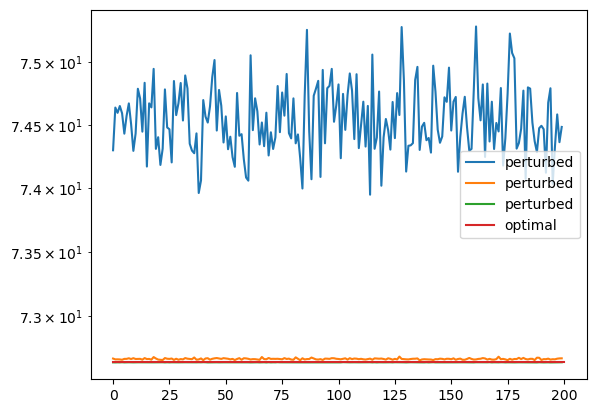

In [15]:
c_opt = econ._c_opt
W_opt = econ.objfunc(c_opt,k0)

for magnitude in [0.1, 0.01, 0.001]:
    W = []
    for _ in range(200):
        perturbation = np.random.normal(size=econ.nbyears)*magnitude

        perturbation[c_opt==1] = -np.abs(perturbation[c_opt==1])
        perturbation[c_opt==0] = +np.abs(perturbation[c_opt==0])

        c = econ._c_opt + perturbation
        W.append(econ.objfunc(c,k0))
    print(f'{min(W)} >  {W_opt} (optimal)')
    plt.semilogy(W,label='perturbed')
plt.semilogy([0, 200],[W_opt, W_opt], label='optimal')
plt.legend()

**Conclusion**

We shown that evaluation of the welfare function on perturbed version of the optimal path leads to a larger value of the welfare. This proof at a numerical level the optimality of the consumption.

### **C. Inifite horizon time**

**Formulation of the infinite horizon time problem**

Ramsey model for infinite horizon time solves 
$$(4)\qquad c = \textrm{ArgMax}U_0= \int_0^\infty u(c) e^{-\theta t }dt \text{ , subject to the dynamics of the capital } \dot k = f(k)-c -(\delta+n) k, \text{ with } k_0(0)=k_0, k(t)\geq 0 \text{ and } c(t)\geq 0.$$
where $f(k)= A k^\alpha$ is the GDP per capita.

**Necessary condition of optimality**

The solution verifies the necessary condition of optimality which are the Euler equations associated with the Larangian, for which an equivalent formulation is provided from the Hamiltonian formulation of the Maximum Principle of Pontryaguine, with the Hamiltonian
$$H(k,\mu,c)= u(c)e^{-\theta t} +\mu\left[ f(k) -c -(\delta + n)k\right],$$
and reads as 
$$
\left\{\begin{array}{cl}
(PM1)&\dot k = \nabla_\mu H,\\
(PM2)&\dot \mu = -\nabla_k H,\\
(PM3)&0=\nabla_c H,\\
(PM4)&k(t_0)=k_0,\\
(PM5)&\lim_{t\rightarrow \infty} k \mu = 0. \text{ (known as the transversality condition)},
\end{array}\right.
$$
where **$\mu(t)$ is the costate variable** associated with the state $k$.

The system can be rewords by introducing the costate $\lambda(t) = \mu e^{\theta t}$.

For which it can be show, that the optimal path is solution of the dynamics 
$$
\left\{\begin{array}{cl}
(EL1)&\dot k  = f(k)-c-(n+\delta)k,\\
(EL2)&\dot c = -\frac{u'(c)}{u''(c)} (f'(k)-(n+\delta)).
\end{array}\right.
$$
where $k(0)=k_0$ but where $c(0)$ is not known. 

**Example of numerical simulation for infinite horizon time**

In [16]:
class OptRamsey(Ramsey):
    
    def f_prime(self, k):
        'Derivative of production function'
        α, A = self.α, self.A
        return α * A * np.power(k, α - 1.)    
    def trend(self, t,state):
        k,c = state
        dk = self.f(k)-c - (self.n+self.δ)*k
        dc = 1/self.γ* (self.f_prime(k)-(self.ρ+self.n))*c
        return np.array([dk,dc])

In [17]:
lagrange_econ = OptRamsey(nbyears=econ.nbyears)
state0 = np.array([k0,econ._c_opt[0]])
#traj = lagrange_econ.super().predict(lagrange_econ.time_window, state0)
traj = super(Ramsey, lagrange_econ).predict(lagrange_econ.time_window, state0)

Time scheme is Euler for Econ studies, with time step dt of 1 yr
Note that the associated discount factor is β:  0.9950124791926823


/tmp/ipykernel_143522/1231883615.py:42: RuntimeWarning: invalid value encountered in power
  return self.A * np.power(k,self.α)
/tmp/ipykernel_143522/3056249753.py:6: RuntimeWarning: invalid value encountered in power
  return α * A * np.power(k, α - 1.)


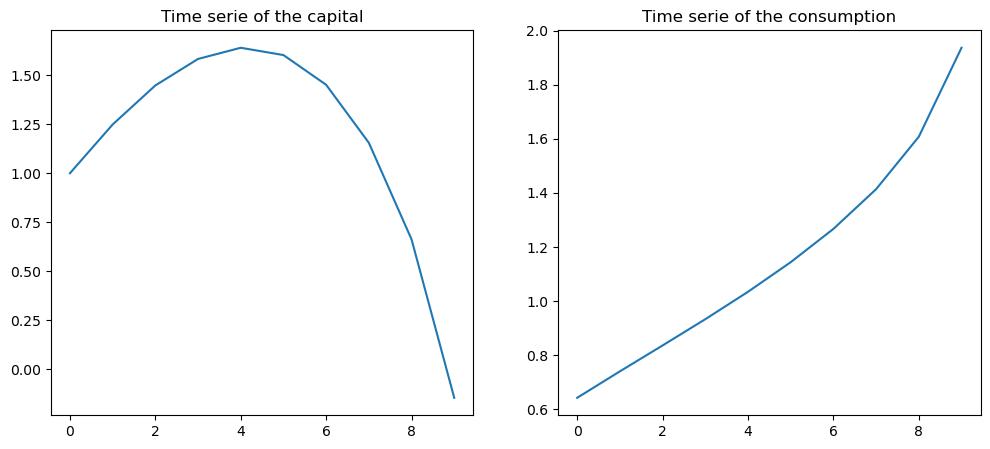

In [18]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ax1,ax2 = axes
ax1.plot(lagrange_econ.time_window, traj[:,0])
ax1.set_title('Time serie of the capital')
ax2.plot(lagrange_econ.time_window, traj[:,1])
ax2.set_title('Time serie of the consumption');

**Conclusion**

Starting from the intial optimal consumption over a finite time period, we observe that captial of the optimal path over the infinite period becomes negative beyond $8$ years. This shows that this trajectory is not feaseable since capital should remains positive, as well as the consumption.

It can be shown that only one trajectory is feaseable for the infinite horizon time Ramsey problem.